In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **Ensembles of Decision Trees**

- *Ensembles* are methods that combine multiple estimators to improve generalizability.

- **Random forests and Boosted-Gradient Trees** are two of the most famous.

## **Random forests**
- The idea behind random forests is "each tree in the forest is slightly different" and do a relatively good job for prediction, but will likeli overfit on part of the data.

- The prediction of the ensemple is given as the average prediction of the individual trees.

#### Critical parametters

- `max_features`:Number of features selected from data sample to construct the trees.
- `n_estimators`:Number of trees in the forest.

In [9]:
# Breast cancer dataset example:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(
    cancer_data.data, cancer_data.target,
    random_state=66
    )

forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [10]:
print(f'Accuracy on training set: {forest.score(X_train, y_train)}')
print(f'Accuracy on test set: {forest.score(X_test, y_test)}')

Accuracy on training set: 1.0
Accuracy on test set: 0.9790209790209791


Plotting feature importances as we did with single decision trees

Text(0, 0.5, 'Feature')

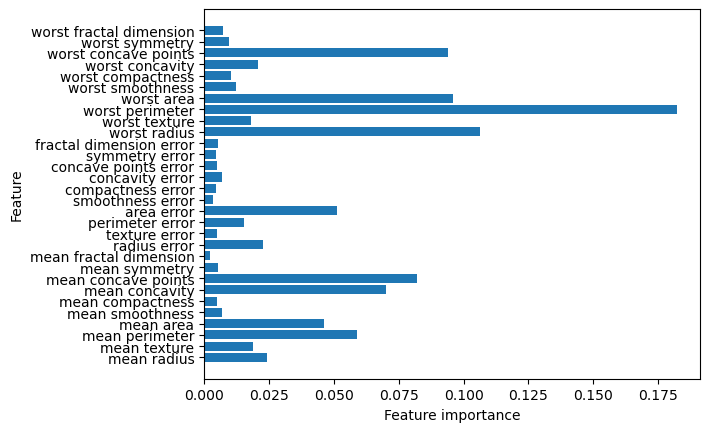

In [12]:
n_features = cancer_data.data.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
# Ticks are the markers denoting data points on the axes
plt.yticks(np.arange(n_features), cancer_data.feature_names) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")

> **The randomness in building the random
forest forces the algorithm to consider many possible explanations, the result
being that the random forest captures a much broader picture of the data than a single
tree.**

*** 

## **Gradient Boosted Trees** 

- Uses weak learners (shallow trees) which makes it faster than random forests

- The main idea behind is to combine many simple models (weak learners) iteratively to improve performance.

- How? The approach is building trees en a serial manner where each tree tries to correct the mistakes of the previous one.

#### Parametters

- ``learning_rate``: controls how strongly each tree is allowed to correct the mistakes the previous trees (overfitting adjustment)

- ``n_estimators``: number of weak learners.

- A common practice is to fit
``n_estimators`` depending on the time and memory budget, and then search over different
``learning_rate``s.

- ``max_depth`` or ``max_leaf_nodes`` to control the complexity of each tree. Usually ``max_depth`` is set very low for gradient boosting models.

In [13]:
from sklearn.ensemble import GradientBoostingClassifier

# Default values 100 estimators, maxdepth 3, lr 0.1
gbc = GradientBoostingClassifier(random_state=0)
# Testing gradient boosting on cancer dataset
gbc.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [14]:
print(f'Accuracy on training set: {gbc.score(X_train, y_train)}')
print(f'Accuracy on test set: {gbc.score(X_test, y_test)}')

Accuracy on training set: 1.0
Accuracy on test set: 0.958041958041958


Trying with even simpler trees

In [21]:
# Modifying parametters
gbc = GradientBoostingClassifier(random_state=0, max_depth=1)
# Testing gradient boosting on cancer dataset
gbc.fit(X_train, y_train)

print(f'Accuracy on training set: {gbc.score(X_train, y_train)}')
print(f'Accuracy on test set: {gbc.score(X_test, y_test)}')

Accuracy on training set: 0.9929577464788732
Accuracy on test set: 0.9790209790209791


What if learning rate decreases even more

In [20]:
# Modifying parametters
gbc = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
# Testing gradient boosting on cancer dataset
gbc.fit(X_train, y_train)

print(f'Accuracy on training set: {gbc.score(X_train, y_train)}')
print(f'Accuracy on test set: {gbc.score(X_test, y_test)}')

Accuracy on training set: 0.9835680751173709
Accuracy on test set: 0.9370629370629371


Text(0, 0.5, 'Feature')

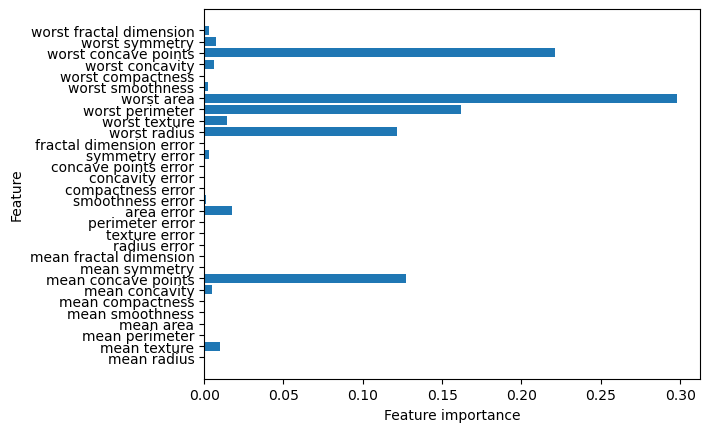

In [22]:
n_features = cancer_data.data.shape[1]
plt.barh(range(n_features), gbc.feature_importances_, align='center')
# Ticks are the markers denoting data points on the axes
plt.yticks(np.arange(n_features), cancer_data.feature_names) 
plt.xlabel("Feature importance")
plt.ylabel("Feature")